In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scripts import project_functions

#Looking at the overall dataframe 
df = project_functions.load("../../data/raw/Medical Expenses.csv")

## Overview of data

In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
BMI,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
Number of Children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
Medical Insurance Charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


From here, I noticed that Sex and smokers wasn't included in the overview because its values aren't in numbers form, but I want to know an overview on those columns too. So I'm going to use 
*value_counts()*

In [3]:
df['Sex'].value_counts()

male      676
female    662
Name: Sex, dtype: int64

In [4]:
df['Smoker'].value_counts()

no     1064
yes     274
Name: Smoker, dtype: int64

#### Investigating gender bias in medicine
##### men vs women average
in the count above, we can see that this dataframe has an equal distribution of men and women

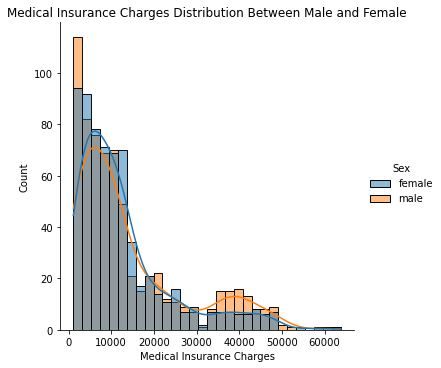

In [5]:
plot1=sns.displot(df, x="Medical Insurance Charges", 
                  hue = "Sex", 
                  bins = 30,
                  kde=True).set(title = "Medical Insurance Charges Distribution Between Male and Female")


from this plot, we can see that there's nothing especially definitive about whether men or women are being charged more based on sex. We can see that while there are more men in the lowest bin, there are also more men in the higher bins. But again, it's not too big of a difference.

#### An average of just men and women?

In [6]:
round(df.groupby('Sex')['Medical Insurance Charges'].mean(),2)

Sex
female    12569.58
male      13956.75
Name: Medical Insurance Charges, dtype: float64

In [7]:
difference = 13956.75-12569.58
percent_difference = round(difference/12569.58*100, 2) #round to 2 decimal places
print("Men's overall average medical insurance charge is", percent_difference, "% higher than women.")

Men's overall average medical insurance charge is 11.04 % higher than women.


Again, it's not big enough of a difference and the spread is quite wide so I'm not convinced that it's a notable difference
## Now let's compare other factors along with sex
Using the male only and female only dfs, see if there's anything interesting within

#### Medical Costs against Age between Men and Women

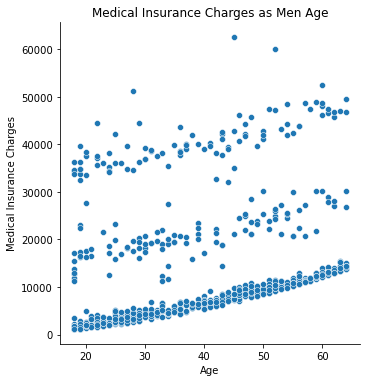

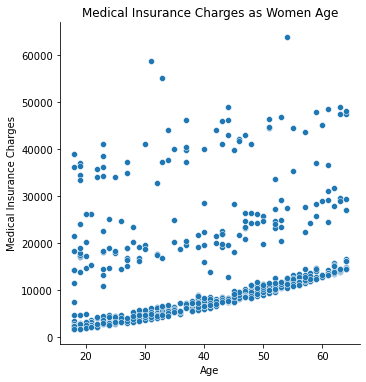

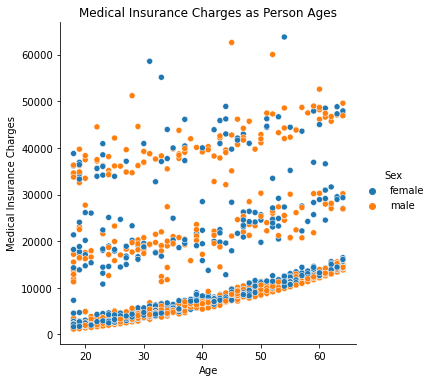

In [8]:
dfmale = project_functions.male_only("../../data/raw/Medical Expenses.csv")
dffemale = project_functions.female_only("../../data/raw/Medical Expenses.csv")

plot2=sns.relplot(data=dfmale, y="Medical Insurance Charges", x = "Age").set(title = "Medical Insurance Charges as Men Age")
plot3= sns.relplot(data=dffemale, y="Medical Insurance Charges", x= "Age").set(title="Medical Insurance Charges as Women Age")
plot4=sns.relplot(data=df, y = "Medical Insurance Charges", x="Age", hue="Sex").set(title = "Medical Insurance Charges as Person Ages")

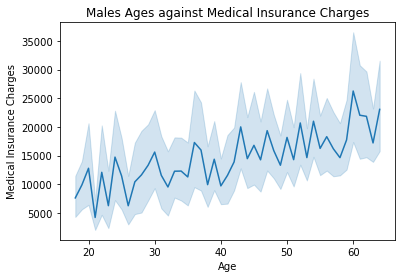

In [16]:
plot10=sns.lineplot(data=dfmale, x= 'Age', y="Medical Insurance Charges").set(title="Males Ages against Medical Insurance Charges")

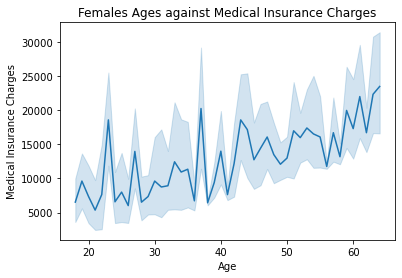

In [18]:
plot11=sns.lineplot(data=dffemale, x= 'Age', y="Medical Insurance Charges").set(title="Females Ages against Medical Insurance Charges")

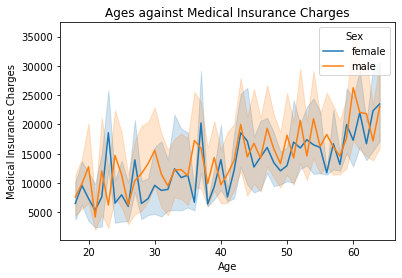

In [24]:
plot12=sns.lineplot(data=df, x= 'Age', y="Medical Insurance Charges", hue="Sex").set(title="Ages against Medical Insurance Charges")

##### Separate into Age Groups and Gender
##### Male:

In [21]:
age_ranges = [15,25,35,45,55,65]
age_groups = ['15-25','25-35','35-45','45-55','55-65']
dfmale['Age Groups'] = pd.cut(df.Age,age_ranges,labels=age_groups,ordered=True)
dfmale.sort_values(by=['Age'])
round(dfmale.groupby('Age Groups')['Medical Insurance Charges'].mean(),2)

Age Groups
15-25    15269.16
25-35    13129.79
35-45    14187.90
45-55    12985.00
55-65    14185.76
Name: Medical Insurance Charges, dtype: float64

##### Female:

In [23]:
dffemale['Age Groups'] = pd.cut(df.Age,age_ranges,labels=age_groups,ordered=True)
dffemale.sort_values(by=['Age'])
round(dffemale.groupby('Age Groups')['Medical Insurance Charges'].mean(),2)

Age Groups
15-25    11904.28
25-35    12729.08
35-45    11052.05
45-55    14071.63
55-65    12849.61
Name: Medical Insurance Charges, dtype: float64

#### The Average Cost of Medical Insurance Charges with Childen: 

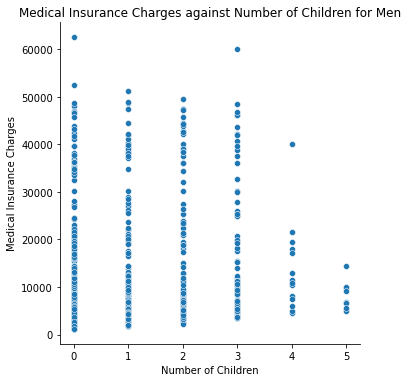

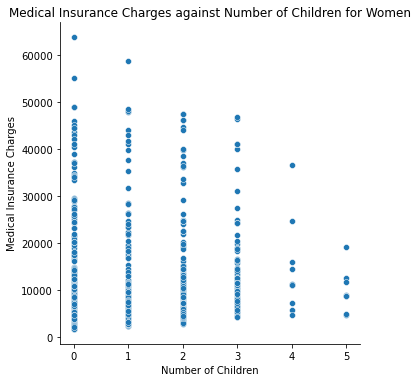

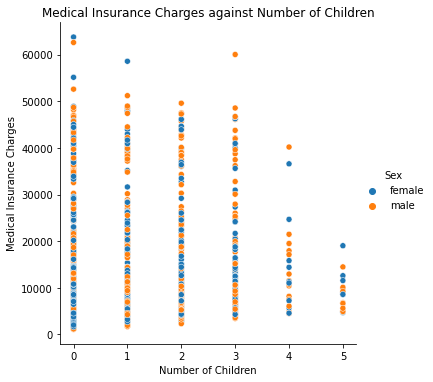

In [27]:
plot13=sns.relplot(data=dfmale, y="Medical Insurance Charges", x = "Number of Children").set(title = "Medical Insurance Charges against Number of Children for Men")
plot14= sns.relplot(data=dffemale, y="Medical Insurance Charges", x= "Number of Children").set(title="Medical Insurance Charges against Number of Children for Women")
plot15=sns.relplot(data=df, y = "Medical Insurance Charges", x="Number of Children", hue="Sex").set(title = "Medical Insurance Charges against Number of Children")

Looking at how the number of children affect the medical insurance charges between men and women, it looks like males have higher insurances charges and that insurance costs seem to decrease with number of children--- unsure if that's accurate to real life, maybe there's some correlation of people seeking medical treatment less with more kids to avoid additional medical charges or that people with less kids are more paranoid with their kids' health.

In [10]:
round(df.groupby(['Sex', 'Number of Children'])['Medical Insurance Charges'].mean(),2)

Sex     Number of Children
female  0                     11905.71
        1                     12161.36
        2                     13941.32
        3                     13865.61
        4                     13937.67
        5                      9854.01
male    0                     12832.70
        1                     13273.52
        2                     16187.10
        3                     16789.17
        4                     13782.28
        5                      7931.66
Name: Medical Insurance Charges, dtype: float64

Looking at just the numbers, men with 2/3 kids pay a noticeable amount more than women with the same number of kids

### Smokers' Medical Insurance Charges Between Male and Female

In [11]:
dfsmoke = project_functions.smokers_only("../../data/raw/Medical Expenses.csv")

dfsmoke[('Sex')].value_counts()


male      159
female    115
Name: Sex, dtype: int64

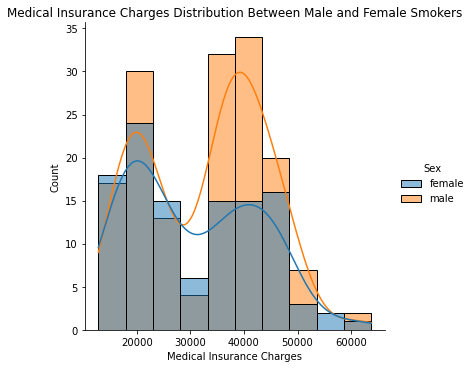

In [12]:
plot5=sns.displot(dfsmoke, x= "Medical Insurance Charges", 
                  hue = "Sex", kde=True).set(title = "Medical Insurance Charges Distribution Between Male and Female Smokers")


Male smokers appear to have higher medical charges overall- note the higher distribution around 40,0000.

In [13]:
round(dfsmoke.groupby(['Sex'])['Medical Insurance Charges'].mean(),2)

Sex
female    30679.00
male      33042.01
Name: Medical Insurance Charges, dtype: float64

The average medical insurance charge of men is about 7.8% higher than women in smokers

From Ravi's analysis, we saw that a disproportionate amount of people in this dataframe have high BMI. So let's take a look at 
## the cost difference in men/wormen against their BMI.


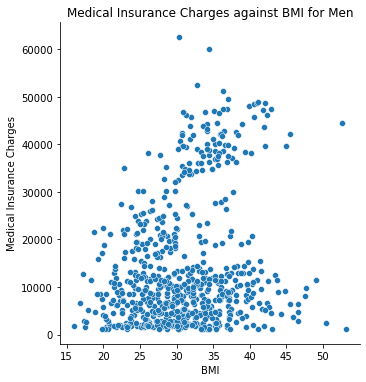

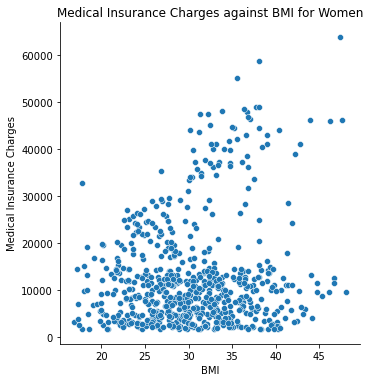

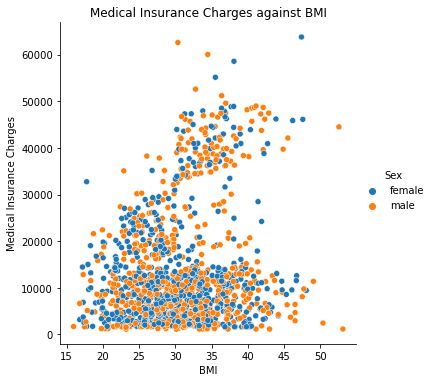

In [14]:
plot6=sns.relplot(data=dfmale, y="Medical Insurance Charges", x = "BMI").set(title = "Medical Insurance Charges against BMI for Men")
plot7= sns.relplot(data=dffemale, y="Medical Insurance Charges", x= "BMI").set(title="Medical Insurance Charges against BMI for Women")
plot8=sns.relplot(data=df, y = "Medical Insurance Charges", x="BMI", hue="Sex").set(title = "Medical Insurance Charges against BMI")

#### Separating BMI into sections and count the number of males/females in each section and compare their avaerage costs

##### BMI less than 20

In [15]:
b20= df.loc[(df['BMI']<=20)]
b20[('Sex')].value_counts()

female    22
male      19
Name: Sex, dtype: int64

In [16]:
round(b20.groupby(['Sex'])['Medical Insurance Charges'].mean(),2)

Sex
female    9089.36
male      8548.16
Name: Medical Insurance Charges, dtype: float64

##### BMI from 20 to 30

In [17]:
b30= df.loc[(df['BMI']<=30)&(df['BMI']>20)]
b30[('Sex')].value_counts()

female    306
male      286
Name: Sex, dtype: int64

In [18]:
round(b30.groupby(['Sex'])['Medical Insurance Charges'].mean(),2)

Sex
female    10853.9
male      10845.1
Name: Medical Insurance Charges, dtype: float64

##### BMI from 30 to 40

In [19]:
b40= df.loc[(df['BMI']<=40)&(df['BMI']>30)]
b40[('Sex')].value_counts()

male      320
female    294
Name: Sex, dtype: int64

In [20]:
round(b40.groupby(['Sex'])['Medical Insurance Charges'].mean(),2)

Sex
female    14234.69
male      16431.42
Name: Medical Insurance Charges, dtype: float64

##### BMI from 40 to 50

In [21]:
b50= df.loc[(df['BMI']<=50)&(df['BMI']>40)]
b50[('Sex')].value_counts()

male      48
female    40
Name: Sex, dtype: int64

In [22]:
round(b50.groupby(['Sex'])['Medical Insurance Charges'].mean(),2)

Sex
female    15370.10
male      18010.28
Name: Medical Insurance Charges, dtype: float64

##### BMI above 50

In [23]:
b51= df.loc[(df['BMI']>50)]
b51[('Sex')].value_counts()

male    3
Name: Sex, dtype: int64

In [24]:
round(b51.groupby(['Sex'])['Medical Insurance Charges'].mean(),2)

Sex
male    16034.31
Name: Medical Insurance Charges, dtype: float64

In [25]:
#create new dataframe with above information

bmid= {'Sex': ['female', 'male'],
       '20': [9089.36, 8548.16],
       '30':[10853.9, 10845.1],
       '40':[14234.69, 16431.42],
      '50': [15370.10, 18010.28],
      '60':[0, 16034.31]}
dfbmi= pd.DataFrame(data=bmid)
dfbmi 
dfbmi = pd.melt(dfbmi, id_vars=['Sex'], 
        var_name='BMI', 
       value_name="Average Medical Insurance Charges") #melt to turn df from wide to long

dfbmi_wide=dfbmi.pivot("BMI", "Sex", "Average Medical Insurance Charges")
#dfbmi['BMI'] = pd.to_numeric(dfbmi['BMI'])
dfbmi_wide

Sex,female,male
BMI,,
20,9089.36,8548.16
30,10853.90,10845.10
40,14234.69,16431.42
50,15370.10,18010.28
60,0.00,16034.31


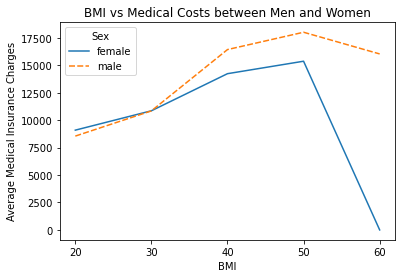

In [26]:
#femalebmipat = dfbmi.query("'Sex' == 'female'")
plot9 = sns.lineplot(data=dfbmi_wide).set(ylabel='Average Medical Insurance Charges', title='BMI vs Medical Costs between Men and Women')

The end of this graph is misleading as there are no datapoints for 50+ BMI in women, but overall men overtake women in medical costs at 30 BMI

## Highest & Lowest Medical Charges

In [27]:
dftop50 = project_functions.top50("../../data/raw/Medical Expenses.csv")
dftop50.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50.0,51.680000,11.029534,22.00000,45.250000,54.00000,60.000000,64.00000
BMI,50.0,37.484800,4.896845,30.21000,33.962500,36.81250,40.565000,52.58000
Number of Children,50.0,1.280000,1.107304,0.00000,0.000000,1.00000,2.000000,3.00000
Medical Insurance Charges,50.0,48003.620097,4589.421458,43753.33705,45182.222212,46972.39665,48642.463687,63770.42801


In [28]:
dftop50['Sex'].value_counts()

male      29
female    21
Name: Sex, dtype: int64

In [29]:
dftop50['Smoker'].value_counts()

yes    50
Name: Smoker, dtype: int64

In [30]:
dftop10 = project_functions.top10("../../data/raw/Medical Expenses.csv")
dftop10.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10.0,47.000000,12.918548,28.00000,35.750000,48.50000,57.750000,64.00000
BMI,10.0,37.124000,4.693422,30.36000,34.746250,36.68000,38.086250,47.41000
Number of Children,10.0,0.800000,1.032796,0.00000,0.000000,0.50000,1.000000,3.00000
Medical Insurance Charges,10.0,55130.961078,5733.165542,48885.13561,49981.886585,53863.11574,59658.817848,63770.42801


In [31]:
dftop10['Sex'].value_counts()

male      6
female    4
Name: Sex, dtype: int64

In [32]:
dfbot50 = project_functions.bot50("../../data/raw/Medical Expenses.csv")
dfbot50.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50.0,18.900000,1.164965,18.0000,18.00000,19.0000,19.000000,22.0000
BMI,50.0,30.709500,7.702093,15.9600,23.70125,31.1150,35.530000,53.1300
Number of Children,50.0,0.000000,0.000000,0.0000,0.00000,0.0000,0.000000,0.0000
Medical Insurance Charges,50.0,1457.836225,217.659779,1121.8739,1245.21375,1611.6384,1632.924413,1704.5681


In [33]:
dfbot50['Sex'].value_counts()

male      40
female    10
Name: Sex, dtype: int64

In [34]:
dfbot50['Smoker'].value_counts()

no    50
Name: Smoker, dtype: int64

In [35]:
dfbot10 = project_functions.bot10("../../data/raw/Medical Expenses.csv")
dfbot10.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10.0,18.00000,0.000000,18.0000,18.000000,18.00000,18.000000,18.0000
BMI,10.0,36.34400,8.069699,23.2100,33.412500,34.26500,40.177500,53.1300
Number of Children,10.0,0.00000,0.000000,0.0000,0.000000,0.00000,0.000000,0.0000
Medical Insurance Charges,10.0,1140.13016,11.216882,1121.8739,1136.055375,1137.24035,1145.458725,1163.4627


In [36]:
dfbot10['Sex'].value_counts()

male    10
Name: Sex, dtype: int64

In [39]:
dftop30m = project_functions.top30male("../../data/raw/Medical Expenses.csv")
dftop30m.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,30.0,52.666667,11.068231,22.00000,48.75000,56.00000,60.000000,64.00000
BMI,30.0,37.275000,4.849853,30.36000,33.93625,36.35000,40.831250,52.58000
Number of Children,30.0,1.366667,1.159171,0.00000,0.00000,1.50000,2.000000,3.00000
Medical Insurance Charges,30.0,47730.043914,4326.533759,43254.41795,44864.59749,46972.39665,48642.463687,62592.87309


In [40]:
dftop30m['Smoker'].value_counts()

yes    30
Name: Smoker, dtype: int64

In [42]:
dftop30m.head(10).describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10.0,53.900000,10.556199,28.000,52.500000,58.000,60.000000,64.00000
BMI,10.0,37.566000,4.016009,30.360,34.963750,38.430,40.831250,42.13000
Number of Children,10.0,1.100000,1.197219,0.000,0.000000,1.000,1.750000,3.00000
Medical Insurance Charges,10.0,51901.918644,5176.541803,48173.361,48674.048525,49273.955,52241.761827,62592.87309


In [44]:
dftop30f = project_functions.top30female("../../data/raw/Medical Expenses.csv")
dftop30f.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,30.0,48.033333,11.043748,23.0000,43.000000,47.50000,56.500000,64.00000
BMI,30.0,37.147833,4.654064,30.2100,34.000000,36.69750,38.736250,47.60000
Number of Children,30.0,1.066667,1.080655,0.0000,0.000000,1.00000,2.000000,3.00000
Medical Insurance Charges,30.0,46286.390066,5138.832091,40904.1995,43132.328725,45436.08025,47748.919762,63770.42801


In [45]:
dftop30m['Smoker'].value_counts()

yes    30
Name: Smoker, dtype: int64

In [46]:
dfbot30m = project_functions.bot30male("../../data/raw/Medical Expenses.csv")
dfbot30m.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,30.0,18.966667,0.964305,18.0000,18.000000,19.0000,19.000000,21.00000
BMI,30.0,30.262000,8.081509,17.4800,23.210000,30.7500,34.422500,53.13000
Number of Children,30.0,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.00000
Medical Insurance Charges,30.0,1331.474080,195.424780,1121.8739,1147.446425,1255.1175,1530.930275,1632.56445


In [47]:
dfbot30f = project_functions.bot30female("../../data/raw/Medical Expenses.csv")
dfbot30f.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,30.0,19.066667,1.014833,18.0000,18.00000,19.0000,19.7500,21.0000
BMI,30.0,31.291000,6.678878,17.8000,27.27250,31.7850,36.4250,40.5000
Number of Children,30.0,0.000000,0.000000,0.0000,0.00000,0.0000,0.0000,0.0000
Medical Insurance Charges,30.0,1809.486757,183.459476,1607.5101,1633.27375,1743.8395,1976.0805,2134.9015
